# Problem 2

## Problem Description
In this problem, you are given a dataset with two input features and one output. You will use a regression tree to make predictions for this data, evaluating each model on both training and testing data. Then, you will repeat this for multiple random forests.

Fill out the notebook as instructed, making the requested plots and printing necessary values. 

*You are welcome to use any of the code provided in the lecture activities.*

#### Summary of deliverables:
- RMSE function
- Create 4 decision tree prediction surface plots
- Create 4 random forest prediction surface plots
- Print RMSE for train and test data for 4 decision tree models
- Print RMSE for train and test data for 4 random forest models
- Answer the 3 questions posed throughout

#### Imports and Utility Functions:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def make_plot(X,y,model, title=""):
    res = 100
    xrange = np.linspace(min(X[:,0]),max(X[:,0]),res)
    yrange = np.linspace(min(X[:,1]),max(X[:,1]),res)
    x1,x2 = np.meshgrid(xrange,yrange)
    xmesh = np.vstack([x1.flatten(),x2.flatten()]).T
    z = model.predict(xmesh).reshape(res,res)
    
    fig = plt.figure(figsize=(12,10))
    plt.subplots_adjust(left=0.3,right=0.9,bottom=.3,top=.9)
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x1,x2,z,cmap=cm.coolwarm,linewidth=0,alpha=0.9)
    ax.scatter(X[:,0],X[:,1],y,'o',c='black')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('y')
    plt.title(title)
    plt.show()

## Load the data
Use the `np.load()` function to load "w5-hw2-train.npy" (training data) and "w5-hw2-test.npy" (testing data). The first two columns of each are the input features. The last column is the output.
You should end up with 4 variables, input and output for each of the datasets.

In [2]:
# YOUR CODE GOES HERE
data_train = np.load("w5-hw2-train.npy")
data_test = np.load("w5-hw2-test.npy")
X_train = data_train[:, 0:-1]
y_train = data_train[:, -1]
X_test = data_test[:, 0:-1]
y_test = data_test[:, -1]

## RMSE function
Complete a root-mean-squared-error function, `RMSE(y, pred)`, which takes in two arrays, and computes the RMSE between them:

In [3]:
def RMSE(y, pred):
    # YOUR CODE GOES HERE
    mse = np.mean((y - pred)**2)
    rmse = np.sqrt(mse)
    return rmse

## Regression trees

Train 4 regression trees in sklearn, with max depth values [2,5,10,25]. Train your models on the training data.

Plot the predictions as a surface plot along with test points -- you can use the provided function: `make_plot(X, y, model, title)`.  
For each model, compute the train and test RMSE by calling your RMSE function. Print these results. 

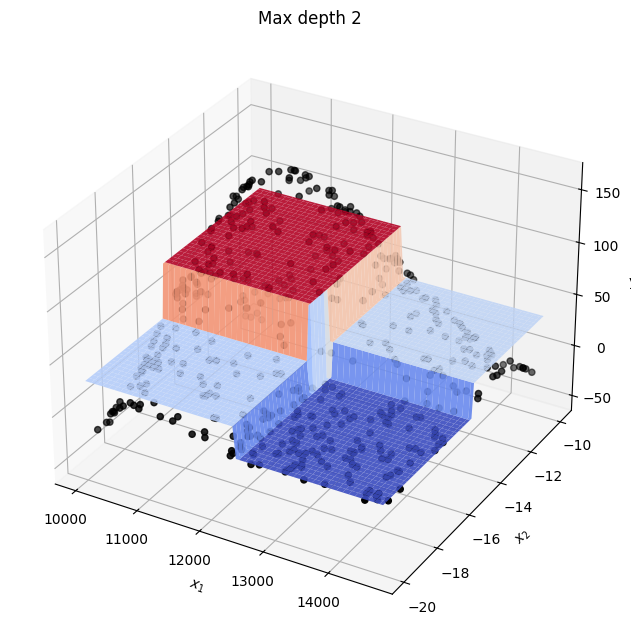

Max depth 2:   Training RMSE = 35.472, Testing RMSE = 37.549


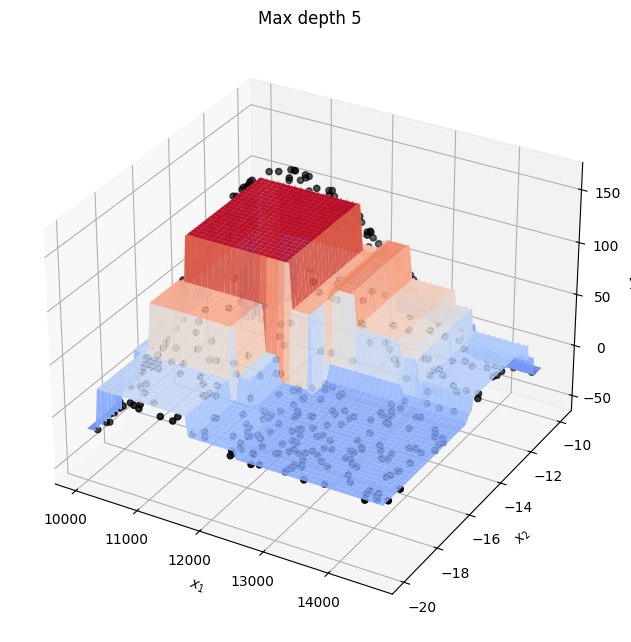

Max depth 5:   Training RMSE = 17.933, Testing RMSE = 19.029


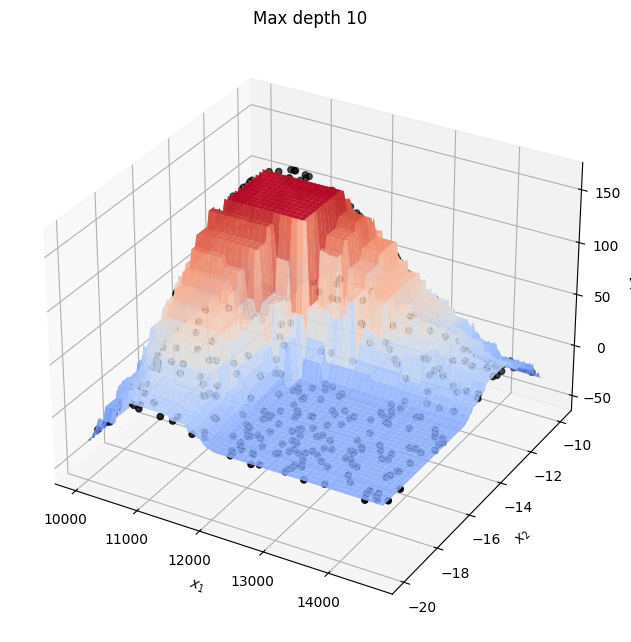

Max depth 10:   Training RMSE = 4.417, Testing RMSE = 7.911


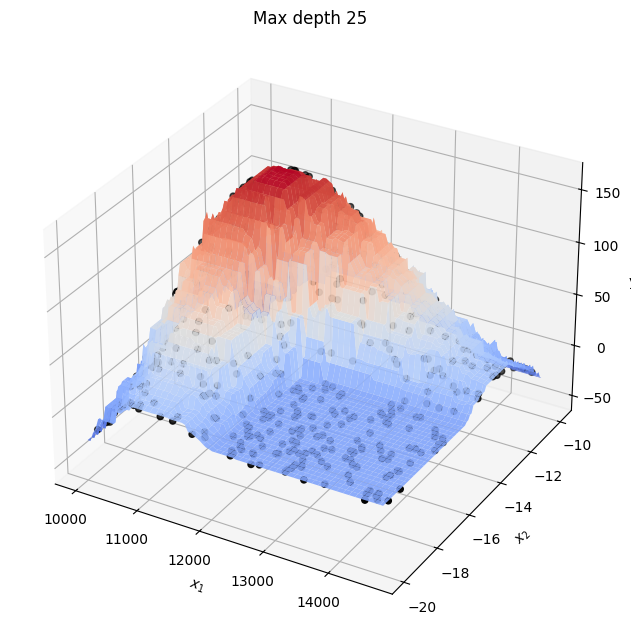

Max depth 25:   Training RMSE = 0.000, Testing RMSE = 5.709


In [7]:
# YOUR CODE GOES HERE
for max_depth in [2, 5, 10, 25]:
    model = DecisionTreeRegressor(max_depth = max_depth)
    model.fit(X_train, y_train)
    make_plot(X_test, y_test, model, title= f"Max depth {max_depth}")
    pred_y_train = model.predict(X_train)
    pred_y_test = model.predict(X_test)
    training_mse = RMSE(y_train, pred_y_train)
    testing_mse = RMSE(y_test, pred_y_test)
    print(f"Max depth {max_depth}:   Training RMSE = {training_mse:.3f}, Testing RMSE = {testing_mse:.3f}")

### Question
- Which of your regression trees performed the best on testing data?
    Max depth 25, had the lowest RMSE on test data.
- Answer: Max depth 25, had the lowest RMSE on test data.

## Regression trees

Train 4 random forests in sklearn. For all of them, use the max depth values from your best-performing regression tree. The number of estimators should vary, with values [5, 10, 25, 100]. 

Plot the predictions as a surface plot along with test points.
Once again, for each model, compute the train and test RMSE by calling your RMSE function. Print these results.

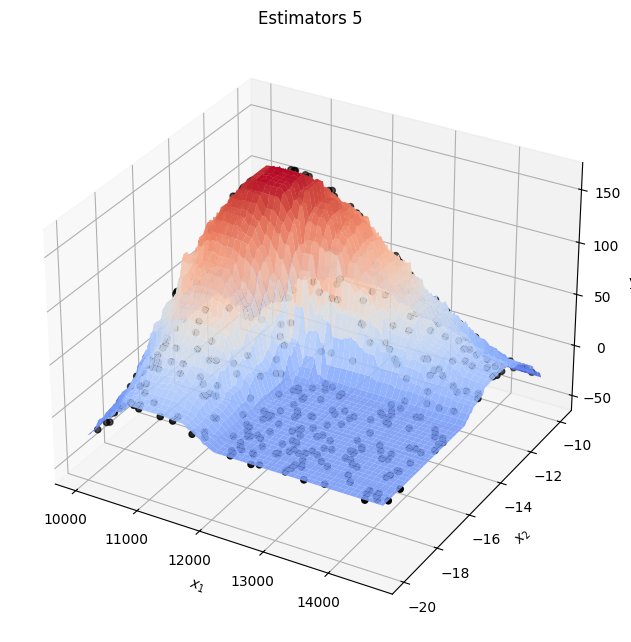

Random Forests with Estimators =5:   Training RMSE = 2.479, Testing RMSE = 4.269


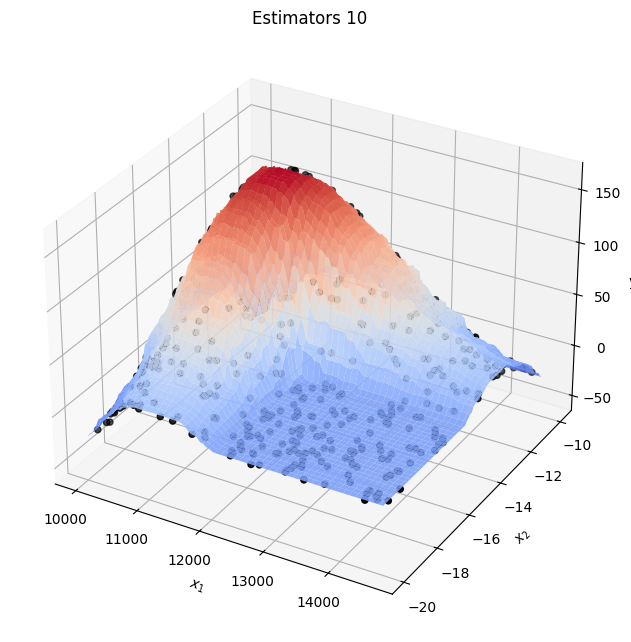

Random Forests with Estimators =10:   Training RMSE = 1.900, Testing RMSE = 3.729


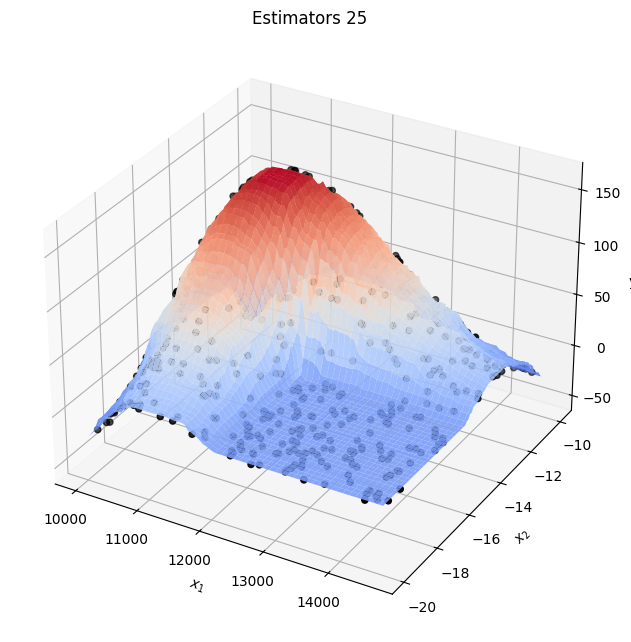

Random Forests with Estimators =25:   Training RMSE = 1.630, Testing RMSE = 3.397


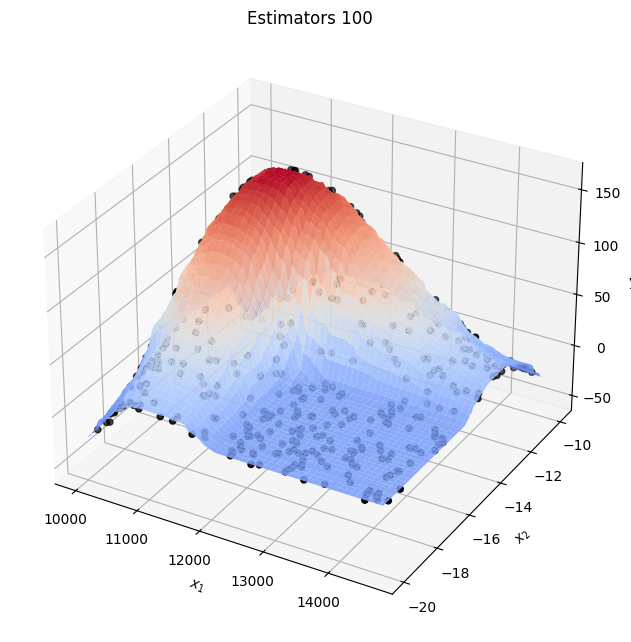

Random Forests with Estimators =100:   Training RMSE = 1.380, Testing RMSE = 2.944


In [9]:
# YOUR CODE GOES HERE
for estimators in [5, 10, 25, 100]:
    RFmodel = RandomForestRegressor(max_depth=25, n_estimators=estimators)
    RFmodel.fit(X_train, y_train)
    make_plot(X_test, y_test, RFmodel, title= f"Estimators {estimators}")
    pred_y_train = RFmodel.predict(X_train)
    pred_y_test = RFmodel.predict(X_test)
    training_mse = RMSE(y_train, pred_y_train)
    testing_mse = RMSE(y_test, pred_y_test)
    print(f"Random Forests with Estimators ={estimators}:   Training RMSE = {training_mse:.3f}, Testing RMSE = {testing_mse:.3f}")   

### Questions
- Which of your random forests performed the best on testing data?
- Answer: Random Forests with Estimators 100 performed the best on testing data.


- How does the random forest prediction surface differ qualitatively from that of the decision tree?
- Answer: Random Forest perdiction surface is much smoother than the decision tree, mainly because bootstrapping and de-correlate trees. 